In [1]:
# задача 1

# Найти корни квадратного уравнения методом градиентного спуска
# x ** 2 - 5 * x + 4 = 0

# надо начать движение от начальной точки в направлении антградиента с заданным шагом
# x = x - lr * grad(x)
# всегда ли сойдемся за приемлемое количество шагов?
# важна ли начальная точка?
# как найти второй корень?
# как влияет ЛР?

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### 1. Нарисуем параболу по нашему уравнению

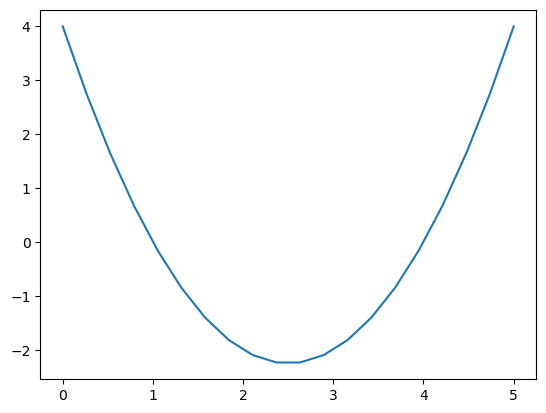

In [3]:
# y = x ** 2 - 5 * x + 4
# Создаем арифметическую последовательность plot_x1
plot_x1 = np.linspace(0, 5, 20)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y1 = (plot_x1 ** 2 - 5 * plot_x1 + 4)
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую квадратного уравнения
plt.plot(plot_x1, plot_y1)
plt.show()

#### 2.1 Найдем значение координаты х в минимуме параболы

In [4]:
# Функция градиента
def dJ(x):
    return 2 * x - 5
 
 # Функция потерь   
def J(x):
    return (x ** 2 - 5 * x + 4)
 
x = 0.0
 # Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
 # Скорость обучения 
learn_rate = 0.1
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = dJ(x)
    last_x = x
    x =x - learn_rate * dj
    history_x.append(x)
    
         # Если итерация достигнута точно, расчет завершен     
    if abs(J(x)-J(last_x))<0.0000000001 :
        break
 
history_y = J(np.array(history_x))
print(f'Координата x в минимуме параболы равна {round(x, 1)}')

Координата x в минимуме параболы равна 2.5


#### 2.2 Представим графически нахождение минимума параболы

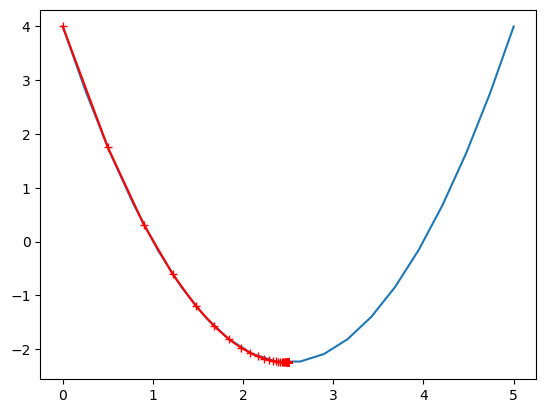

In [5]:
plt.plot(plot_x1, plot_y1)
plt.plot(history_x, history_y,color='r', marker='+')

#### 3.1 Так как квадратное уравнение имеет два корня, возведем уравнение параболы в квадрат и представим графически

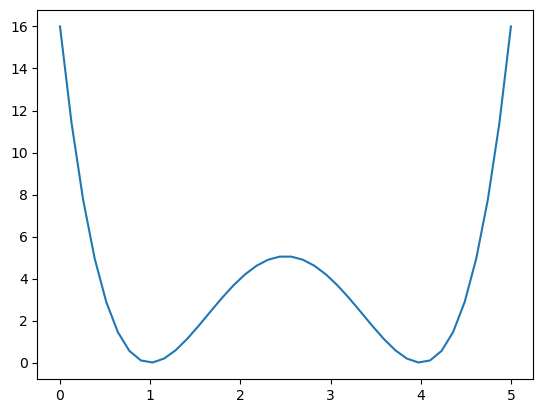

In [6]:
# Создаем арифметическую последовательность plot_x2
plot_x2 = np.linspace(0, 5, 40)
# Рассчитываем plot_y2 согласно нашему уравнению
plot_y2 = (plot_x2 ** 2 - 5 * plot_x2 + 4)**2
# Возьмем соответствующее положение plot_x2 plot_y2 как координаты x, y точки, затем нарисуем кривую уравнения
plt.plot(plot_x2, plot_y2)
plt.show()


#### 3.1 Так как квадратное уравнение имеет два корня, будем идти "влево" и "вправо" по оси х от полученнго ранее минимума параболы х = 2.5

In [7]:
# Функция градиента
def dJ(x):
    return 4 * x ** 3 - 30 * x ** 2 + 66 * x - 40
 
 # Функция потерь    
def J(x):
    return (x ** 2 - 5 * x + 4)**2
 
 
x = 2.5

x1 = 2.5 - 0.1
x2 = 2.5 + 0.1
 # Записываем точку каждого падения градиента
history_x1=[x1]
history_x2=[x2]
i_iter=0.06
 # Скорость обучения 
learn_rate = 0.1
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.06
    dj1 = dJ(x1)
    dj2 = dJ(x2)
    last_x1 = x1
    last_x2 = x2
    x1 = x1 - learn_rate * dj1
    x2 = x2 - learn_rate * dj2
    history_x1.append(x1)
    history_x2.append(x2)
    
         # Если итерация достигнута точно, расчет завершен     
    if abs(J(x1)-J(last_x1))<0.0000000001 :
        break
    if abs(J(x2)-J(last_x2))<0.0000000001 :
        break
 
history_y1 = J(np.array(history_x1))
history_y2 = J(np.array(history_x2))

print(f'Корни квадратного уровня: х1 = {round(x1, 1)}, х2 = {round(x2, 1)}')

Корни квадратного уровня: х1 = 1.0, х2 = 4.0


#### 3.2 Представим графически нахождение корней уравнения

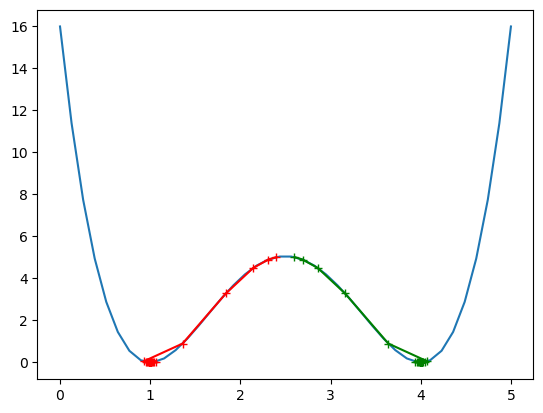

In [8]:
plt.plot(plot_x2,plot_y2)
plt.plot(history_x1,history_y1,color='r',marker='+')
plt.plot(history_x2,history_y2,color='g',marker='+')

##### всегда ли сойдемся за приемлемое количество шагов? - это зависит от того, каким мы выбрали LR
##### важна ли начальная точка? - если у функции несколько экстремумов, начальная точка критически важна
##### как найти второй корень? - нужно выбрать другую начальную точку, чтобы она приводила к другому корню
##### как влияет ЛР? - очень сильно влияет. В данном примере, если ЛР будет больше 0.1 и меньше 0.0001, будут получены неверные значения